# CSE 5243 - Introduction to Data Mining
## Homework 4: Clustering
- Semester: Fall 2022
- Instructor: Greg Ryslik
- Section: Wednesday/Friday 12:45PM
- Student Name: John Smith
- Student.#: smith.3
***

**Instructions and Helpful Hints:**
- Consider putting all of your "discussion" text in markdown cells, not inline with code. That gives you more control over formatting. Markdown cheat sheet: https://www.markdownguide.org/cheat-sheet
- Explain what you are doing, and why.  Explain what you found out or learned.
- *Make sure you run your entire workbook before handing it in, so the output cells are populated.*
- Follow the Section structure as much as possible - put your content where it is requested, so we can find your answers.
- If you have questions on expectations or need clarification or guidance, please ask.  Post to Teams if it is a general question, so everyone benefits.
***

# Introduction

### Objectives:

In this lab, you will perform clustering on three datasets.  Your will choose suitable clustering algorithms, evaluate them on the datasets, and compare their performance.

The objectives of this assignment are:
1.	Understand how to select and evaluate suitable off-the-shelf clustering algorithms based on the characteristics of a dataset and the outcomes you need.
2.	Understand how to tune and evaluate a clustering algorithm to achieve good performance.

### Datasets:

- The file **small_Xydf.csv** is a two-dimensional dataset with 200 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large1_Xydf.csv** is a two-dimensional dataset with 3000 records.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

- The file **large2_Xydf.csv** is another two-dimensional dataset with 3000 records, and characteristics different from the “large1” dataset.  It contains columns X0, X1, and y.  The y column is the actual cluster number that was produced by the dataset generation algorithm.  Do not use it for the clustering algorithm.  It will be used to evaluate your clustering algorithm below.

### Approach:

This homework makes use of the Clustering Algorithms offered by the SciKitLearn Library.  Study the information at https://scikit-learn.org/stable/modules/clustering.html.  Follow the guidance in the individual sections below.

### Collaboration:

For this assignment, you should work as an individual. You may informally discuss ideas with classmates, to get advice on general Python usage, etc., but your work should be your own.  Please make use of Microsoft Teams!

### What you need to turn in:

1.	Code

-	For this homework, the code is the Jupyter Notebook.  Use the provided Jupyter Notebook template, and fill in the appropriate information.
-	This homework requires you to use clustering algorithms in the SciKitLearn library.  You also may use common Python libraries for I/O, data manipulation, data visualization, etc. (e.g., NumPy, Pandas, MatPlotLib,…).  You may not use library operations that perform, in effect, the entire “core” computations for this homework. (e.g., If you happen to find a single function on the web that does essentially *all* of a major portion of the homework, you may not use it.)  When in doubt, ask the grader or instructor.
-	The code must be written by you, and any significant code snips you found on the Internet and used to understand how to do your coding for the core functionality must be attributed.  (You do not need to attribute basic functionality – matrix operations, IO, etc.)
-	The code must be commented sufficiently to allow a reader to understand the algorithm without reading the actual Python, step by step.
-	When in doubt, ask the grader or instructor.

2.	Written Report
-	For this homework, the report is the Jupyter Notebook.  The report should be well-written.  Please proof-read and remove spelling and grammar errors and typos.
-	The report should discuss your analysis and observations. Key points and findings must be written in a style suitable for consumption by non-experts.  Present charts and graphs to support your observations. If you performed any data processing, cleaning, etc., please discuss it within the report.

### Grading:

1.	Overall readability and organization of your report (10%) - Is it well organized and does the presentation flow in a logical manner; are there many grammar and spelling mistakes; do the charts/graphs relate to the text, etc.
2.	Evaluation of the KNN Clustering Algorithm on the Small Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
3.	Evaluation of the KNN Clustering Algorithm on the Large1 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
4.	Evaluation of the KNN Clustering Algorithm on the Large2 Dataset (15%) – Is your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
5.	Evaluation of the Second Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
6.	Evaluation of the Third Clustering Algorithm on the Large2 Dataset (15%) – Is your choice of algorithm and your configuration sound?  Have you made an effort to tune the algorithm for good performance?  Are your analyses and evaluations sound, and supported by suitable statistics and/or visualizations?
7.	Comparison of the Three Clustering Algorithms (10%) - Is the comparison sound?  Did you choose a specific clustering algorithm as best and explain why?
8.	Conclusions (5%) – Did you document your overall insights? 

### How to turn in your work on Carmen:

**Please follow these instructions exactly** - it helps the grading process.  If you have questions, please ask.  Submit to Carmen any code that you used to process and analyze this data. You do not need to include the input data.  All the related files (code and/or report) except for the data should be archived in a **zip file (with no folder trees inside)** and submitted via Carmen.  The submitted file should be less than 5MB.  Use this naming convention: **HomeworkN_Surname_DotNumber.zip**

### References and Acknowledgements:

1.	https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster
2.	https://scikit-learn.org/stable/modules/clustering.html
3.	https://docs.python.org/3/library/time.html
4.	https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linear_sum_assignment.html
5.	https://gist.github.com/siolag161/dc6e42b64e1bde1f263b (using Hungarian Algorithm to match cluster labels - this is just an example)
6.	https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html (note that this is **mean** squared error)
***

***
# Section: Overview
- Insert a short description of the scope of this exercise, any supporting information, etc.
***

- This exercise is mainly for me to master the realization and parameter selection of a variety of clustering methods. At the same time, through this exercise, I need to master the evaluation method of clustering effect and visualization.

***
# Section: Setup
- Add any needed imports, helper functions, etc., here.
***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

***
# Section: 1 - Evaluate the **K-Means** Algorithm on the **Small** Dataset
***

***
## Section: 1.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

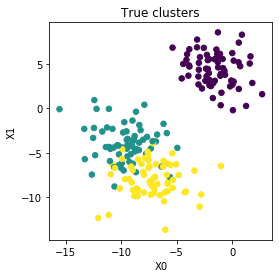

<Figure size 432x288 with 0 Axes>

In [2]:
def plot_cluster(title,X,y,size):
    plt.figure(figsize=(size,size))
    plt.title(title)
    plt.xlabel("X0")
    plt.ylabel("X1")
    plt.scatter(X[:,0],X[:,1],s=30,c=y)
    plt.show()
    plt.clf()

small_data = pd.read_csv("small_Xydf.csv",header=0)
small_data = small_data.iloc[:,1:]
X = small_data[['X0','X1']].to_numpy()
y = small_data['y'].to_numpy()
true_y = small_data['y']
plot_cluster("True clusters",X,y,4)

In [3]:
small_data

,X0,X1,y
0,-8.725226,-9.914383,2
1,-12.362349,-5.284858,1
2,-8.179872,-6.274891,2
3,-9.532723,-2.588246,1
4,-3.395447,-7.024462,2
...,...,...,...
195,-9.729616,-1.549239,1
196,-0.633700,3.810304,0
197,-3.002052,4.381161,0
198,-9.138660,-5.167345,1


### Define WSS and calculate True WSS

In [4]:
def wss(data_df):
    # get the centroid X0 and X1 of 3 clusters
    centroid = data_df.groupby('y').agg('mean')
    def cal_wss_each(x):
        return(pow(x['X0']-centroid.loc[x['y'],'X0'],2)+pow(x['X1']-centroid.loc[x['y'],'X1'],2))
    wss_each = data_df.apply(lambda row : cal_wss_each(row), axis = 1)
    return wss_each.sum()
True_WSS = wss(small_data)  
True_WSS

1506.532187125321

In [5]:
centroid

NameError: name 'centroid' is not defined

### Define BSS and calculate True BSS

In [ ]:
def bss(data_df):
    # get the centroid X0 and X1 of 3 clusters
    centroid = data_df.groupby('y').agg('mean')
    centroid['y'] = centroid.index
    # get the mean of all X0 and X1
    all_mean = data_df.mean()
    cluster_size = data_df.y.value_counts()
    def cal_bss_each(x):
        return(cluster_size[x['y']]*pow(x['X0']-all_mean['X0'],2)+cluster_size[x['y']]*pow(x['X1']-all_mean['X1'],2))
    bss_each = centroid.apply(lambda row : cal_bss_each(row), axis = 1)
    return bss_each.sum()
True_BSS = bss(small_data)
True_BSS

### Total SSE (WSS+BSS)

In [ ]:
def total_sse(WSS,BSS):
    return WSS+BSS
True_total_SSE = total_sse(True_WSS, True_BSS)
True_total_SSE

***
## Section: 1.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [ ]:
from time import process_time

range_clusters_k = [2,3,4]
Pred_WSS = []
Pred_BSS = []
Pred_SSE = []
Running_time = []

for k in range_clusters_k:
    start = process_time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred_y = kmeans.fit_predict(X)
    end=process_time()
    # first convert X to (200,2) then vstack with pred_y, we get (200,3), then transform it to (3,200)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y'])
    end=process_time() 
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
    #calculate BSS
    pred_bss=bss(data_df)
    Pred_BSS.append(pred_bss)
    #calculate SSE
    pred_sse=total_sse(pred_wss,pred_bss)
    Pred_SSE.append(pred_sse)
    #calculate running time
    pred_time=end-start
    Running_time.append(pred_time)
    #print WSS,BSS,SSE,Time
    print("K= ",k," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)

# visuliazation
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_clusters_k, Pred_WSS, 'p-',label='WSS')
plt.xlabel('Num of clusters')
plt.ylabel('WSS')
plt.legend()
fig.add_subplot(222)
plt.plot(range_clusters_k, Pred_BSS, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('BSS')
plt.legend()
fig.add_subplot(223)
plt.plot(range_clusters_k, Pred_SSE, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('SSE')
plt.legend()
fig.add_subplot(224)
plt.plot(range_clusters_k, Running_time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

***
## Section: 1.3 - For the K=3 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [ ]:
pred_y = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plot_cluster("True clusters",X,y,4)
plot_cluster("Predicted clusters",X,pred_y,4)

In [ ]:
from sklearn.metrics import confusion_matrix
from munkres import Munkres

def make_cost_matrix(c1, c2):
    """
    """
    uc1 = np.unique(c1)
    uc2 = np.unique(c2)
    l1 = uc1.size
    l2 = uc2.size
    #assert(l1 == l2 and np.all(uc1 == uc2))

    m = np.ones([l1, l2])
    for i in range(l1):
        it_i = np.nonzero(c1[i] == uc1[i])[0]
        for j in range(l2):
            it_j = np.nonzero(c2[j] == uc2[j])[0]
            m_ij = np.intersect1d(it_j, it_i)
            m[i,j] =  -m_ij.size
    return m

def translate_clustering(clt, mapper):
    return np.array([ mapper[i] for i in clt ])

def accuracy(cm):
    """computes accuracy from confusion matrix"""
    return np.trace(cm, dtype=float) / np.sum(cm)

def calculate_cost_matrix(C, n_clusters):
    cost_matrix = np.zeros((n_clusters, n_clusters))

    # cost_matrix[i,j] will be the cost of assigning cluster i to label j
    for j in range(n_clusters):
        s = np.sum(C[:,j]) # number of examples in cluster i
        for i in range(n_clusters):
            t = C[i,j]
            cost_matrix[j,i] = s-t
    return cost_matrix

def tabulation_matrix(y_true,y_pred):
    """entry point"""
    
    num_labels = len(np.unique(y_true))
    n_clusters = len(np.unique(y_pred))
    
    cm = confusion_matrix(y_true, y_pred, labels=range(num_labels)) # gets the confusion matrix
    print ("---------------------\nold confusion matrix:\n" \
          " %s\naccuracy: %.2f" % (str(cm), accuracy(cm)))

    #cost_matrix = make_cost_matrix(y_pred, y_true)
    cost_matrix = calculate_cost_matrix(cm, num_labels)
    print('cost matrix:\n',cost_matrix)

    m = Munkres()
    indexes = m.compute(cost_matrix)
    print('index:',indexes)
    mapper = { old: new for (old, new) in indexes }

    print ("---------------------\nmapping:")
    for old, new in mapper.items():
        print ("map: %s --> %s" %(old, new))

    new_labels = translate_clustering(y_pred, mapper)
   
    
    new_cm = confusion_matrix(y_true, new_labels, labels=range(num_labels))
    print ("---------------------\nnew confusion matrix:\n" \
          " %s\naccuracy: %.2f" % (str(new_cm), accuracy(new_cm)))
    
tabulation_matrix(y,pred_y)

### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [ ]:
from sklearn.metrics import classification_report
classification_report(y, pred_y, labels=None, target_names=None, sample_weight=None, digits=2)

***
## Section: 1.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### observation
- Total SSE is a contant.
- The larger the K, the longer the program will run.
- The larger K is, the smaller WSS is.

### K=3 is best
- When K is at 3, WSS produces an inflection point.

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    pred_y = kmeans.fit_predict(X)
    end=process_time()
    # first convert X to (200,2) then vstack with pred_y, we get (200,3), then transform it to (3,200)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y'])
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
    
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 2 - Evaluate the **K-Means** Algorithm on the **Large1** Dataset
***

***
## Section: 2.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

In [ ]:
L1_data = pd.read_csv('large1_Xydf.csv')
L1_data = L1_data.iloc[:,1:]
true_y=L1_data['y']
X = L1_data[['X0','X1']].to_numpy()
y = L1_data['y'].to_numpy()
plot_cluster("True Clusters", X, y, 4)
L1_data

### calculate True WSS

In [ ]:
True_WSS=wss(L1_data)
True_WSS

### Calculate True BSS

In [ ]:
True_BSS=bss(L1_data)
True_BSS

### Calculate True Total SSE

In [ ]:
True_SSE = total_sse(True_WSS, True_BSS)
True_SSE

***
## Section: 2.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=6, 8, 10.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [ ]:
range_clusters_k = [6,8,10]
Pred_WSS = []
Pred_BSS = []
Pred_SSE = []
Running_time = []

for k in range_clusters_k:
    start = process_time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred_y = kmeans.fit_predict(X)
    end=process_time() 
    # first convert X to (200,2) then vstack with pred_y, we get (200,3), then transform it to (3,200)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y'])
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
    #calculate BSS
    pred_bss=bss(data_df)
    Pred_BSS.append(pred_bss)
    #calculate SSE
    pred_sse=total_sse(pred_wss,pred_bss)
    Pred_SSE.append(pred_sse)
    #calculate running time
    pred_time=end-start
    Running_time.append(pred_time)
    #print WSS,BSS,SSE,Time
    print("K= ",k," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)

# visuliazation
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_clusters_k, Pred_WSS, 'p-',label='WSS')
plt.xlabel('Num of clusters')
plt.ylabel('WSS')
plt.legend()
fig.add_subplot(222)
plt.plot(range_clusters_k, Pred_BSS, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('BSS')
plt.legend()
fig.add_subplot(223)
plt.plot(range_clusters_k, Pred_SSE, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('SSE')
plt.legend()
fig.add_subplot(224)
plt.plot(range_clusters_k, Running_time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

***
## Section: 2.3 - For the K=8 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [ ]:
pred_y = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plot_cluster("True clusters",X,y,4)
plot_cluster("Predicted clusters",X,pred_y,4)

### Create a cross tabulation matrix comparing the true and assigned clusters

In [ ]:
tabulation_matrix(y,pred_y)

### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [ ]:
classification_report(y, pred_y, labels=None, target_names=None, sample_weight=None, digits=2)

***
## Section: 2.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observation:

- Total SSE is a contant.
- The larger the K, the longer the program will run.
- The larger K is, the smaller WSS is.

### K=7 is best

- When K is at 7, WSS produces an inflection point.

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    pred_y = clusterer.fit_predict(X)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y']) 
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 3 - Evaluate the **K-Means** Algorithm on the **Large2** Dataset
***

***
## Section: 3.1 - Calculate True Cluster Measures
- Given that you know the true clusters (from column y in the original data), compute the true within-cluster WSS (also called “SSE” in the slides), the between-cluster BSS, and the Total SSE (WSS+BSS).
***

### calculate True WSS

In [ ]:
True_WSS=wss(L2_data)
True_WSS

### Calculate True BSS

In [ ]:
True_BSS=bss(L2_data)
True_BSS

### Calculate True Total SSE

In [ ]:
True_SSE = total_sse(True_WSS, True_BSS)
True_SSE

***
## Section: 3.2 - Configure and Run the SciKitLearn K-Means Algorithm
- Explain all configuration parameter values you chose, and why you chose them.
- Run your algorithm for K=2, 3, 4.
- For each run, compute the WSS, BSS, and Total SSE (WSS+BSS), and compute the running time (see Python Time reference – see %%time, time.process_time(), etc.).
***

In [ ]:
L2_data = pd.read_csv('large2_Xydf.csv')
L2_data = L2_data.iloc[:,1:]
true_y=L2_data['y']
X = L2_data[['X0','X1']].to_numpy()
y = L2_data['y'].to_numpy()
plot_cluster("True Clusters", X, y, 4)
L2_data

In [ ]:
range_clusters_k = [2,3,4]
Pred_WSS = []
Pred_BSS = []
Pred_SSE = []
Running_time = []

for k in range_clusters_k:
    start = process_time()
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred_y = kmeans.fit_predict(X)
    end=process_time() 
    # first convert X to (200,2) then vstack with pred_y, we get (200,3), then transform it to (3,200)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y'])
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
    #calculate BSS
    pred_bss=bss(data_df)
    Pred_BSS.append(pred_bss)
    #calculate SSE
    pred_sse=total_sse(pred_wss,pred_bss)
    Pred_SSE.append(pred_sse)
    #calculate running time
    pred_time=end-start
    Running_time.append(pred_time)
    #print WSS,BSS,SSE,Time
    print("K= ",k," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)

# visuliazation
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_clusters_k, Pred_WSS, 'p-',label='WSS')
plt.xlabel('Num of clusters')
plt.ylabel('WSS')
plt.legend()
fig.add_subplot(222)
plt.plot(range_clusters_k, Pred_BSS, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('BSS')
plt.legend()
fig.add_subplot(223)
plt.plot(range_clusters_k, Pred_SSE, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('SSE')
plt.legend()
fig.add_subplot(224)
plt.plot(range_clusters_k, Running_time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

***
## Section: 3.3 - For the K=2 Case Above:
- Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
- Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [ ]:
clusterer = KMeans(n_clusters = 2, random_state=42)
pred_y = clusterer.fit_predict(X)
plot_cluster("True Clusters", X, y, 5)
plot_cluster("Pred Clusters K=2", X, pred_y, 5)

### Create a cross tabulation matrix comparing the true and assigned clusters

In [ ]:
tabulation_matrix(y,pred_y)

### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [ ]:
classification_report(y, pred_y, labels=None, target_names=None, sample_weight=None, digits=2)

***
## Section: 3.4 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (K value in particular), and why?
- Support this with statistics and/or graphs.
***

### Observation:

- Limitations of K-means: Non-globular Shapes

### K=6 is best

- When K is at 6, WSS produces an inflection point.Overcoming Limitations of K-means: Non-globular Shapes

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    pred_y = clusterer.fit_predict(X)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y']) 
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 4 - Evaluate a **Second** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 4.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

### Spectral Clustering

- The process does not require too many assumptions on data structure. For example, Kmeans requires data to be convex set.
- By constructing sparse Similarity graph, it can significantly outperform other algorithms in computing speed for larger data sets.
- As spectral clustering is a graph cutting process, there is no clustering of discrete clusters like kmesns clustering.
- There is no need to make assumptions about the probability distribution of data like GMM.

In [ ]:
from sklearn.cluster import SpectralClustering

***
## Section: 4.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

In [ ]:
range_clusters_k = [2,3,4]
Pred_WSS = []
Pred_BSS = []
Pred_SSE = []
Running_time = []

for k in range_clusters_k:
    start = process_time()
    clusters = SpectralClustering(n_clusters= k)
    pred_y = clusters.fit_predict(X)
    end=process_time() 
    # first convert X to (200,2) then vstack with pred_y, we get (200,3), then transform it to (3,200)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y'])
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
    #calculate BSS
    pred_bss=bss(data_df)
    Pred_BSS.append(pred_bss)
    #calculate SSE
    pred_sse=total_sse(pred_wss,pred_bss)
    Pred_SSE.append(pred_sse)
    #calculate running time
    pred_time=end-start
    Running_time.append(pred_time)
    #print WSS,BSS,SSE,Time
    plot_cluster("Pred Clusters", X, pred_y, 5)
    print("K= ",k," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)

# visuliazation
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_clusters_k, Pred_WSS, 'p-',label='WSS')
plt.xlabel('Num of clusters')
plt.ylabel('WSS')
plt.legend()
fig.add_subplot(222)
plt.plot(range_clusters_k, Pred_BSS, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('BSS')
plt.legend()
fig.add_subplot(223)
plt.plot(range_clusters_k, Pred_SSE, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('SSE')
plt.legend()
fig.add_subplot(224)
plt.plot(range_clusters_k, Running_time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

### Create a cross tabulation matrix comparing the true and assigned clusters

In [ ]:
clusterer = SpectralClustering(n_clusters = 2)
y_pred = clusterer.fit_predict(X)
tabulation_matrix(y,y_pred)

### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [ ]:
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

***
## Section: 4.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

### Observation:

- Larger num_clusters not always produces the smaller WSS!!!!
- Increasing num_clusters can overcoming Limitations of K-means: Non-globular Shapes

### K=4 is best

- When K is at 4, WSS produces an inflection point.Overcoming Limitations of K-means: Non-globular Shapes

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    clusterer = SpectralClustering(n_clusters = n_clusters, random_state=42)
    pred_y = clusterer.fit_predict(X)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y']) 
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 5 - Evaluate a **Third** Clustering Algorithm on the **Large2** Dataset
***

***
## Section: 5.1 - Choose a Clustering Algorithm from the SciKitLearn Library  
- Explain why you chose it.
- See the SciKitLearn references.
***

### Agglomerative Clustering
- One of the advantages of the algorithm is that the clustering of data sets can be displayed at different scales (levels).

In [ ]:
from sklearn.cluster import AgglomerativeClustering

***
## Section: 5.2 - Configure and Run the Algorithm
- Do this for (at least) two variations of the configuration settings (if any).  Explain all configuration parameter values you chose, and why you chose them.
- For Each Run:
1. Compute the within-cluster WSS, the between-cluster BSS, and the Total SSE (WSS+BSS), and compute the running time.
2. Create a scatterplot, overlaying the true cluster with the cluster produced by your algorithm.  (Or alternatively, create two side by side scatterplots).
3. Create a cross tabulation matrix (i.e., confusion matrix) comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. - see classification_report).  Note that you may need to "match up" the true and assigned cluster labels.  See the linear-sum-assignment and Hungarian algorithm references, for example.
***

### Set n_clusters=2, 3, 4; Compute WSS, BSS, Total SSE (WSS+BSS), and running time; Create scatterplots

In [ ]:
range_clusters_k = [2,3,4]
Pred_WSS = []
Pred_BSS = []
Pred_SSE = []
Running_time = []

for k in range_clusters_k:
    start = process_time()
    clusters = AgglomerativeClustering(n_clusters= k)
    pred_y = clusters.fit_predict(X)
    end=process_time() 
    # first convert X to (200,2) then vstack with pred_y, we get (200,3), then transform it to (3,200)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y'])
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
    #calculate BSS
    pred_bss=bss(data_df)
    Pred_BSS.append(pred_bss)
    #calculate SSE
    pred_sse=total_sse(pred_wss,pred_bss)
    Pred_SSE.append(pred_sse)
    #calculate running time
    pred_time=end-start
    Running_time.append(pred_time)
    #print WSS,BSS,SSE,Time
    plot_cluster("Pred Clusters", X, pred_y, 5)
    print("K= ",k," WSS= ",pred_wss," BSS= ",pred_bss," SSE= ",pred_sse," Time= ",pred_time)

# visuliazation
fig = plt.figure(figsize=(14,10))
fig.add_subplot(221)
plt.plot(range_clusters_k, Pred_WSS, 'p-',label='WSS')
plt.xlabel('Num of clusters')
plt.ylabel('WSS')
plt.legend()
fig.add_subplot(222)
plt.plot(range_clusters_k, Pred_BSS, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('BSS')
plt.legend()
fig.add_subplot(223)
plt.plot(range_clusters_k, Pred_SSE, 'p-',label='BSS')
plt.xlabel('Num of clusters')
plt.ylabel('SSE')
plt.legend()
fig.add_subplot(224)
plt.plot(range_clusters_k, Running_time,'p-',label='Time')
plt.xlabel("Number of cluster")
plt.ylabel("Time")
plt.title("Time")
plt.legend()
plt.show()

### Create a cross tabulation matrix comparing the true and assigned clusters

In [ ]:
clusterer = AgglomerativeClustering(n_clusters = 2)
y_pred = clusterer.fit_predict(X)
tabulation_matrix(y,y_pred)

### Comparing the true and assigned clusters, and the basic measures (precision, recall, F1, accuracy, etc. )

In [ ]:
classification_report(y, y_pred, labels=None, target_names=None, sample_weight=None, digits=2)

***
## Section: 5.3 - Record Your Observations
- What do you observe or conclude from these experiments?
- Which is your “preferred” clustering (configuration settings, if any), and why?
- Support this with statistics and/or graphs.
***

### Observation:

- Total SSE is a contant.
- The larger the num_clusters, the longer the program will run.
- The larger num_clusters is, the smaller WSS is.
- Increasing num_clusters can overcoming Limitations of K-means: Non-globular Shapes

### K=4 is best

- When K is at 4, WSS produces an inflection point.Overcoming Limitations of K-means: Non-globular Shapes

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
# record WSS for every value of K
Pred_WSS = []

for n_clusters in range_n_clusters:
    #iterating through cluster sizes
    clusterer = AgglomerativeClustering(n_clusters = n_clusters)
    pred_y = clusterer.fit_predict(X)
    data_array = np.vstack([X.T,pred_y]).T
    data_df = pd.DataFrame(data_array, columns = ['X0','X1','y']) 
    #calculate WSS
    pred_wss=wss(data_df)
    Pred_WSS.append(pred_wss)
fig = plt.figure()
plt.plot(range_n_clusters, Pred_WSS,'p-',label='WSS')
plt.xlabel("Number of cluster")
plt.ylabel("WSS")
plt.title("WSS")
plt.legend()
plt.show()

***
# Section: 6 - Comparison of the Three Clustering Algorithms on the **Large2** Dataset
***

***
## Section: 6.1 - Compare Their Performance
- What was their relative performance (quality and timing), and their performance versus the true clustering?
- What characteristics of the data might impact the clustering algorithms' performance?
***

### Relative performance and performance versus the true clustering
- Qulity: Agglomerative(wss:1378)> Spectral(wss:1315)> KMeans(wss:1310)
- Time: Spectral > Agglomerative > KMeans
- Performance versus the true clustering: Agglomerative(0.83)> Spectral(0.78)> KMeans(0.75)

### What characteristics of the data might impact the clustering algorithms' performance?

### Size:
- Each category in the three datasets is similar in size, so the classification works well. If the category sizes are not similar, the effect will be different.

### Density:
- Each category in the three datasets is similar in density, so the classification works well. If the category density are not similar, the effect will be different.

### Non-globular Shapes:
- The clustering effect of the third data set is not very good due to the Non-globular Shapes.

***
## Section: 6.2 - Choose a Best Clustering Algorithm
- Choose one of the three clustering algorithm as best and explain why.
***

### Choose one of the three clustering algorithm as best and explain why.
- I think K-means is the Best:
- Simple and fast , which is one of the important reasons why k-means is used most in the industry. 
- You only need to change k when you call a parameter. And the choice of k is easy. 
- The principle of the algorithm is simple and explicable.

***
# Section: 7 - Conclusions
- Write a paragraph on what you discovered or learned from this homework.
***

- I learned the realization of three clustering methods and understood the meaning of each parameter.
- I learned how to calculate WSS, BSS and SSE methods, as well as calculate program running time.
- I understand that different characteristics of data will affect the clustering effect.
- I learned how to evaluate the clustering effect by comparing it with standard clustering.

***
### END-OF-SUBMISSION
***